# Image classification with fashion_mnist dataset Using CNN

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import math

### loading and splitting the data

In [52]:
# Loading the Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [53]:
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Training data shape: (60000, 784) (60000,)
Test data shape: (10000, 784) (10000,)


In [54]:
# Defining class names for labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [55]:
pd.DataFrame(class_names)

,0
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [56]:
x_train_flat = x_train.reshape(-1,784)
x_test_flat = x_test.reshape(-1,784)

df_train = pd.DataFrame(x_train_flat)
df_train['label'] = y_train
df_train['label_name'] = df_train['label'].apply(lambda x: class_names[x])  # Map label to name

df_test = pd.DataFrame(x_test_flat)
df_train

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,label_name
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0,0,T-shirt/top
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,T-shirt/top
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3,Dress
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,T-shirt/top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5,Sandal
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,Trouser
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3,Dress
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0,0,T-shirt/top


In [57]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.121569,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.105882,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


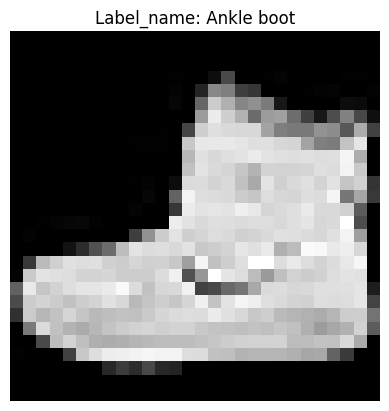

In [58]:
# Select an image index
index = 0

# Reshape the image to 28x28 before displaying
plt.imshow(x_train[index].reshape(28, 28), cmap="gray")
# Display the first image
plt.title(f"Label_name: {class_names[y_train[index]]}") 
plt.axis("off")

plt.show()

### create model layers

In [59]:
# Reshape input data to 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\kaitale\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# compile the model
model.compile(
              optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
)

In [62]:
# Train the model
history = model.fit(x_train, y_train, batch_size=23, epochs=5, validation_split=0.2)

# Evaluate the model
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.8028 - loss: 0.5542 - val_accuracy: 0.8740 - val_loss: 0.3400
Epoch 2/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.9003 - loss: 0.2767 - val_accuracy: 0.9025 - val_loss: 0.2606
Epoch 3/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 86s 23ms/step - accuracy: 0.9200 - loss: 0.2199 - val_accuracy: 0.9153 - val_loss: 0.2352
Epoch 4/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 69s 33ms/step - accuracy: 0.9297 - loss: 0.1874 - val_accuracy: 0.9137 - val_loss: 0.2416
Epoch 5/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 58s 28ms/step - accuracy: 0.9419 - loss: 0.1551 - val_accuracy: 0.9179 - val_loss: 0.2191
313/313 - 3s - 8ms/step - accuracy: 0.9211 - loss: 0.2279
Test loss: 0.22786010801792145
Test accuracy: 0.9211000204086304


##### when we use the CNN in the classification of the fashion_mnist,
##### we see our test accurancy is higher

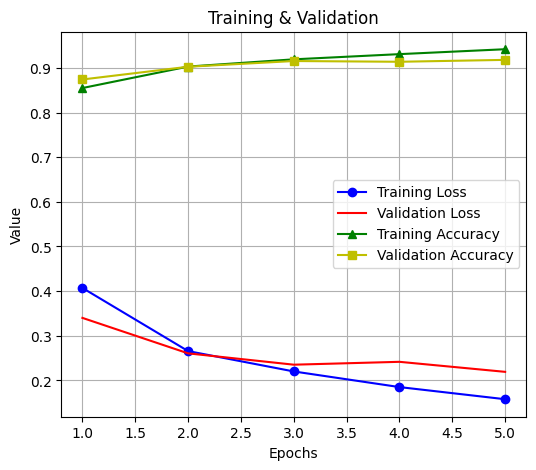

In [63]:
# Visualizing the loss and Accuracy the loss

epoch = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(6,5))
# plt.subplots(1,2)
plt.plot(epoch, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epoch, history.history['val_loss'], '-r', label='Validation Loss')
plt.plot(epoch, history.history['accuracy'], 'g^-', label='Training Accuracy')
plt.plot(epoch, history.history['val_accuracy'], 'ys-', label='Validation Accuracy')


plt.title('Training & Validation')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

### prediction output

In [64]:
predictions = model.predict(x_test)


# Get predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert to DataFrame with label names
df_test = pd.DataFrame(x_test_flat)
df_test['actual_label'] = y_test
df_test['predicted_label'] = predicted_labels
df_test['actual_name'] = df_test['actual_label'].apply(lambda x: class_names[x])
df_test['predicted_name'] = df_test['predicted_label'].apply(lambda x: class_names[x])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [65]:
# Show sample predictions
df_test[['actual_label','predicted_label','actual_name', 'predicted_name']].head()

,actual_label,predicted_label,actual_name,predicted_name
0,9,9,Ankle boot,Ankle boot
1,2,2,Pullover,Pullover
2,1,1,Trouser,Trouser
3,1,1,Trouser,Trouser
4,6,6,Shirt,Shirt


In [66]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,actual_label,predicted_label,actual_name,predicted_name
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,9,9,Ankle boot,Ankle boot
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.682353,0.741176,0.262745,0.0,0.0,0.0,2,2,Pullover,Pullover
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,Trouser,Trouser
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,Trouser,Trouser
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,6,6,Shirt,Shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,9,9,Ankle boot,Ankle boot
9996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.121569,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,Trouser,Trouser
9997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,8,8,Bag,Bag
9998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,Trouser,Trouser


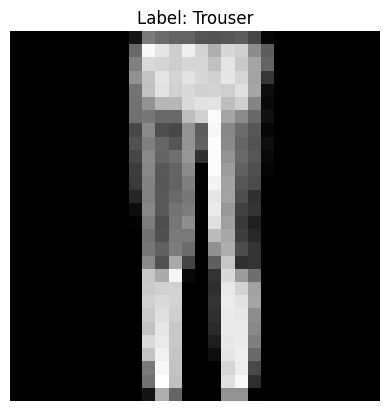

In [67]:
# Display the third image
plt.imshow(x_test[3].reshape(28, 28), cmap="gray")
plt.title(f"Label: {class_names[y_test[3]]}") 

plt.axis("off")
plt.show()

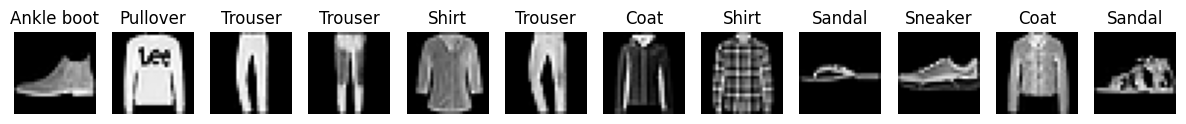

In [68]:
plt.figure(figsize=(15, 5))
for i in range(12):
    plt.subplot(1, 12, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    # plt.title(f"Label: {y_test[i]}")
    plt.title(class_names[y_test[i]]) 
    plt.axis("off")
plt.show()

### Overview

Here we see that our model has been able to predict the correct output as shown in the images above using CNN

1. We loaded the fashion_mnist dataset
2. we splited the data into a train set and test set
3. we visualized some sample data in the train train dataset
4. we created the model
5. we evaluated the model to find the loss and accuracy
6. we visualized the loss and accuracy
7. we predicted the model output on the train set
8. we visualized the model output

#### Author

    Name:  Kaitale Muhammad
    Email: kaitalemuhammad1@gmail.com
    Tel:   +256-780531741